### Comparison of classification algorithms on the Iris dataset

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [107]:
from sklearn.datasets import load_iris
iris = load_iris()

print iris.feature_names
print iris.target_names
print iris.data.shape

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150L, 4L)


In [108]:
classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

results_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    
    classifier.fit(X_train, y_train)
    
    predictions = classifier.predict(X_test)
    
    classifier_accuracy = accuracy_score(y_test, predictions)
    
    result_entry = pd.DataFrame([[classifier_name, classifier_accuracy]], columns=['Classifier', 'Accuracy'])
    results_df = results_df.append(result_entry)
    
    print classifier_name + ('-'*10)
    print "Accuracy: {}".format(classifier_accuracy * 100) + '%'
    print '\n'

print results_df


KNeighborsClassifier----------
Accuracy: 97.7777777778%


DecisionTreeClassifier----------
Accuracy: 95.5555555556%


RandomForestClassifier----------
Accuracy: 95.5555555556%


               Classifier  Accuracy
0    KNeighborsClassifier  0.977778
0  DecisionTreeClassifier  0.955556
0  RandomForestClassifier  0.955556


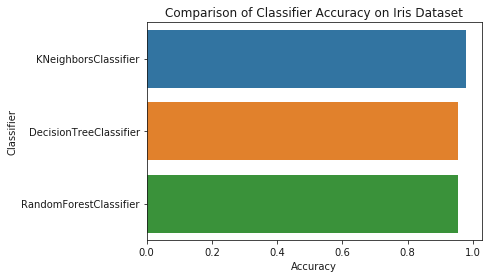

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Accuracy", y="Classifier", data=results_df)
plt.title('Comparison of Classifier Accuracy on Iris Dataset')
plt.show()
